<a href="https://colab.research.google.com/github/hebamuh68/Machine-Learning-Specialization/blob/main/Neural_network/NN_4_PetImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import random
import pickle

# **Load The Dataset**

In [26]:
DATADIR = '/content/drive/MyDrive/Colab Notebooks/PetImages'
CATEGORIES = ["Dog", "Cat"]

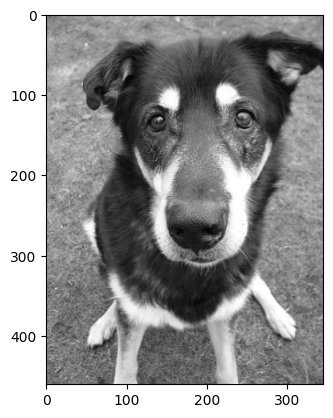

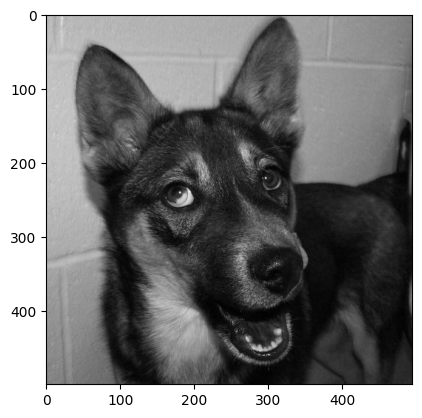

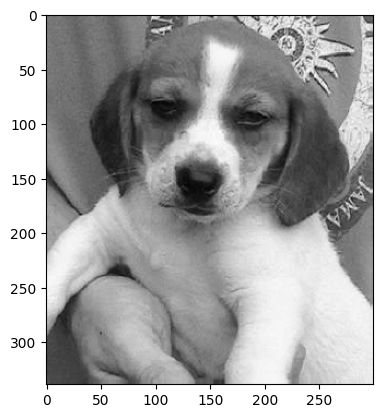

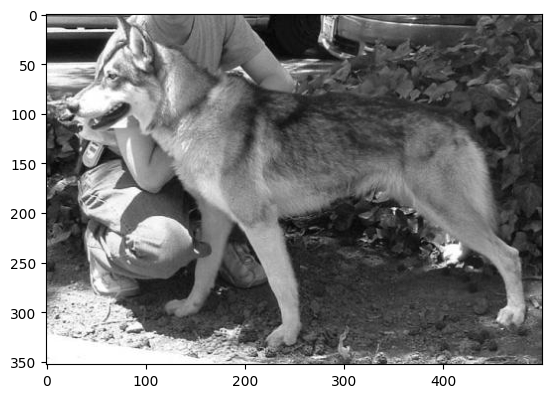

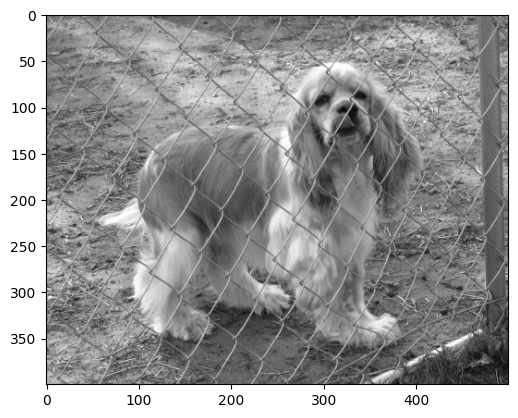

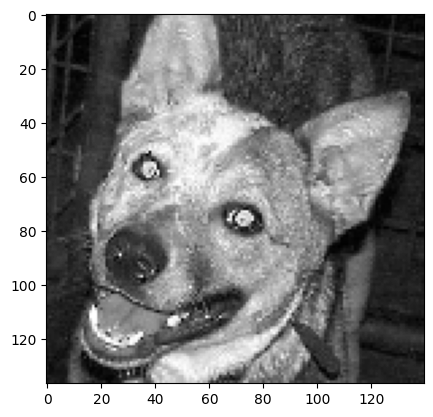

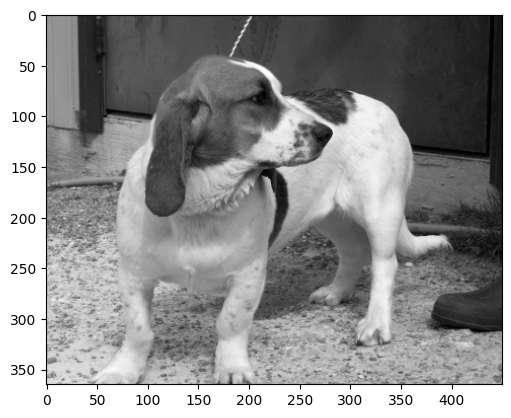

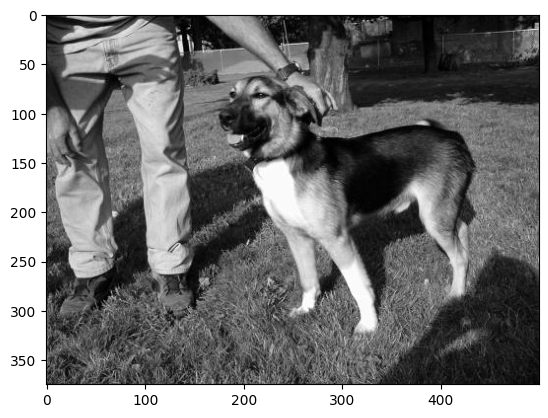

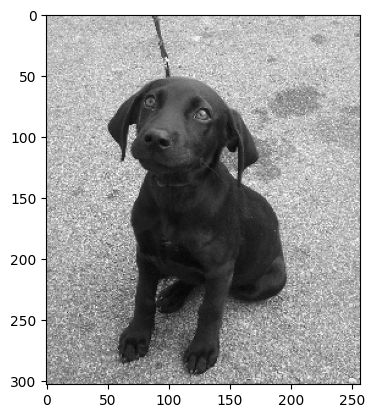

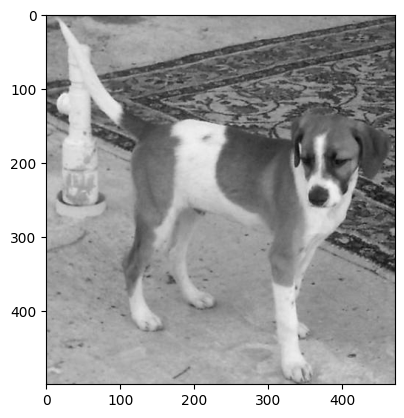

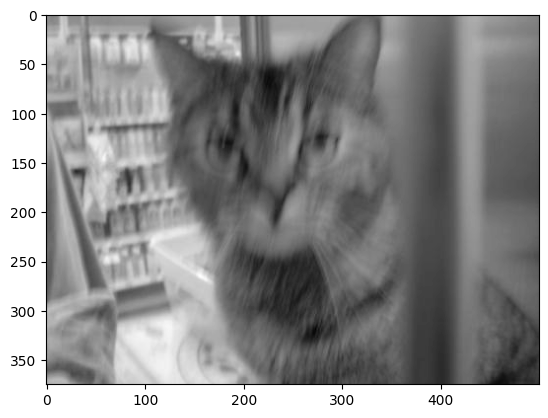

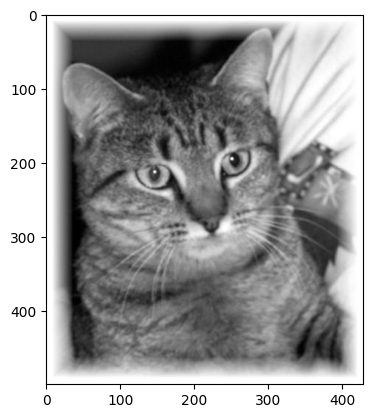

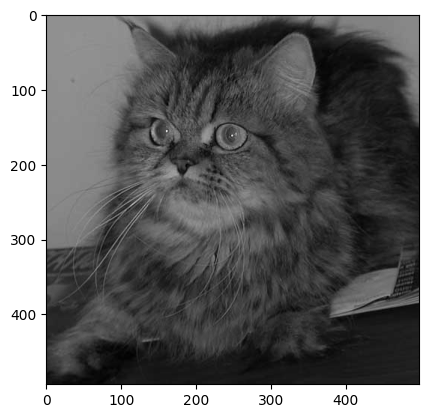

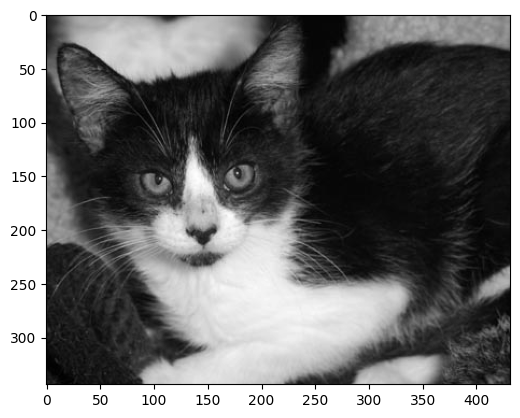

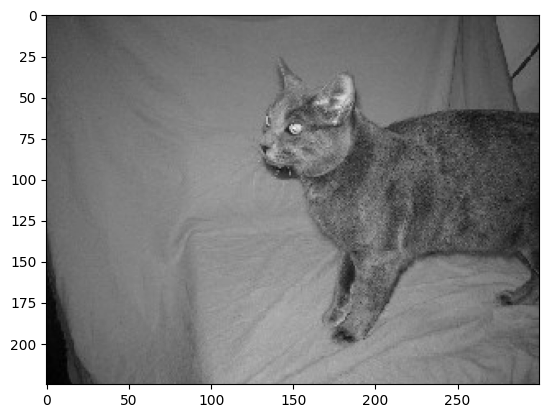

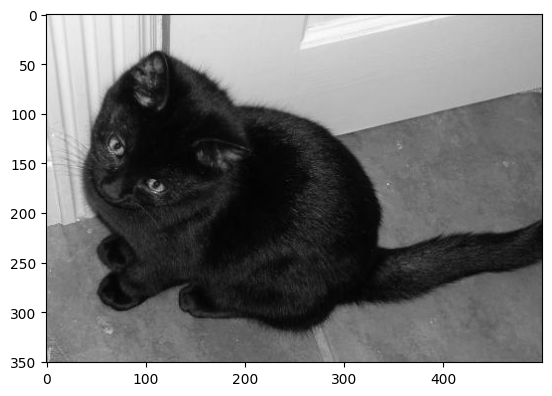

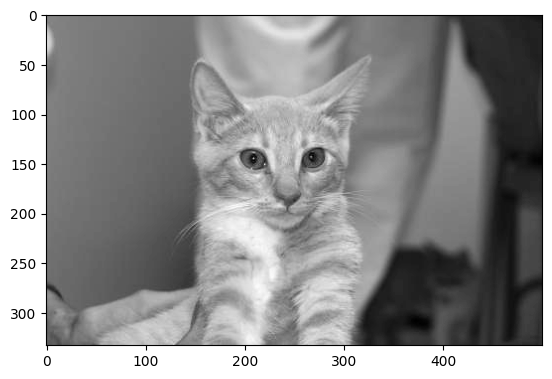

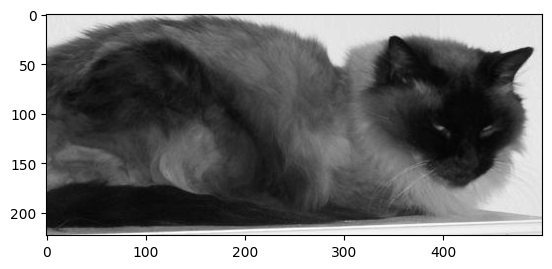

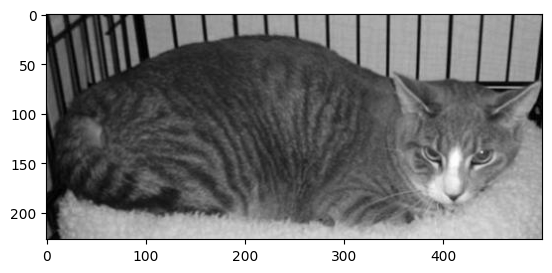

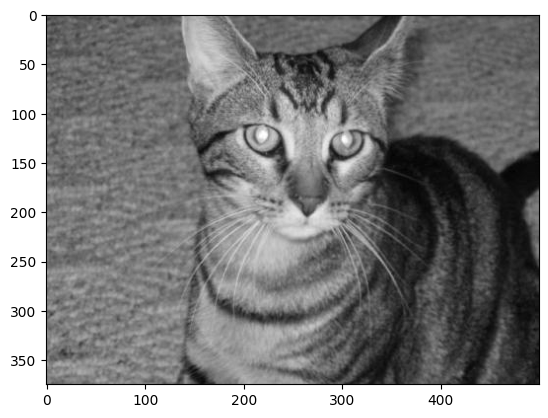

In [27]:
# View 1st 10 images of cat and dogs to verify the path correction
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it in grey
        plt.show()
        if x==10 :
            break

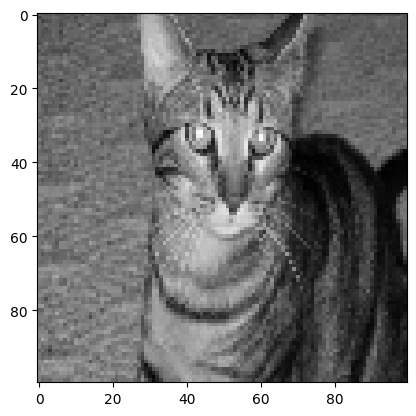

In [28]:
# Normalisation

# choose the smallest size we can use for all images and still can recognise the item
# we should unify all the images sizes
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [29]:
# we apply the size we find good for all images we have

# training data will contain the [image with the new size, its class(whther it dog or cat / the category the loop working on)]
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:
                pass


create_training_data()

print(len(training_data))

100%|██████████| 500/500 [00:04<00:00, 124.49it/s]

999


In [30]:
# training_data are ordered as dogs then cats, we should shuffle the data before entrting it to the model
# shuffle work on data in place
random.shuffle(training_data)

In [31]:
# Split the training data into features/images and labels
images = []
labels = []

for features,label in training_data:
    images.append(features)
    labels.append(label)

# convert the list to matrix
images= np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE)
labels= np.array(labels)

In [32]:
# Store the train_images and train_labels we made
pickle_out = open('images','wb')
pickle.dump(images, pickle_out)
pickle_out.close()

pickle_out = open('labels','wb')
pickle.dump(labels, pickle_out)
pickle_out.close()


pickle_in = open('images','rb')
images = pickle.load(pickle_in)

pickle_in = open('labels','rb')
labels = pickle.load(pickle_in)

In [37]:
from sklearn .model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state=42)


# **Build the NN**

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax) # 2 is ouput classes number, can't use random num here
])

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Train The Model**

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5075 - loss: 120.1599
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5201 - loss: 73.4685
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.4708 - loss: 46.7601
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5289 - loss: 26.7828
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.5148 - loss: 12.6028
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.4661 - loss: 9.7143
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.5006 - loss: 2.8548
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5029 - loss: 1.3119
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5349 - loss: 1.3366
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.5404 - loss: 1.8258


In [41]:
val_loss, val_acc = model.evaluate(test_images, test_labels)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5193 - loss: 0.8542
